In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
recipe_reviews_and_user_feedback = fetch_ucirepo(id=911)

# data (as pandas dataframes)
X = recipe_reviews_and_user_feedback.data.features
y = recipe_reviews_and_user_feedback.data.targets

In [ ]:
# metadata
print(recipe_reviews_and_user_feedback.metadata)

# variable information
print(recipe_reviews_and_user_feedback.variables)


{'uci_id': 911, 'name': 'Recipe Reviews and User Feedback', 'repository_url': 'https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/911/data.csv', 'abstract': 'The "Recipe Reviews and User Feedback Dataset" is a comprehensive repository of data encompassing various aspects of recipe reviews and user interactions. It includes essential information such as the recipe name, its ranking on the top 100 recipes list, a unique recipe code, and user details like user ID, user name, and an internal user reputation score.\n\nEach review comment is uniquely identified with a comment ID and comes with additional attributes, including the creation timestamp, reply count, and the number of up-votes and down-votes received. Users\' sentiment towards recipes is quantified on a 1 to 5 star rating scale, with a score of 0 denoting an absence of rating.\n\nThis dataset is a valuable resource for researchers and data scie

In [ ]:
# Display the first few entries in X and y
print("First 5 Reviews:")
print(X.head())




First 5 Reviews:
   num_records  recipe_number  recipe_code         recipe_name  \
0            0              1        14299  Creamy White Chili   
1            1              1        14299  Creamy White Chili   
2            2              1        14299  Creamy White Chili   
3            3              1        14299  Creamy White Chili   
4            4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467            

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Defining Pre-Processing Functions
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a string, if not, convert it to string
    if not isinstance(text, str):
        text = str(text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove non-letter characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]

    # Join tokens back to string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Apply preprocessing to all reviews
X['cleaned_review'] = X['text'].apply(preprocess_text)

In [ ]:
print(X.head())

   num_records  recipe_number  recipe_code         recipe_name  \
0            0              1        14299  Creamy White Chili   
1            1              1        14299  Creamy White Chili   
2            2              1        14299  Creamy White Chili   
3            3              1        14299  Creamy White Chili   
4            4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687

In [ ]:
!pip install wordcloud


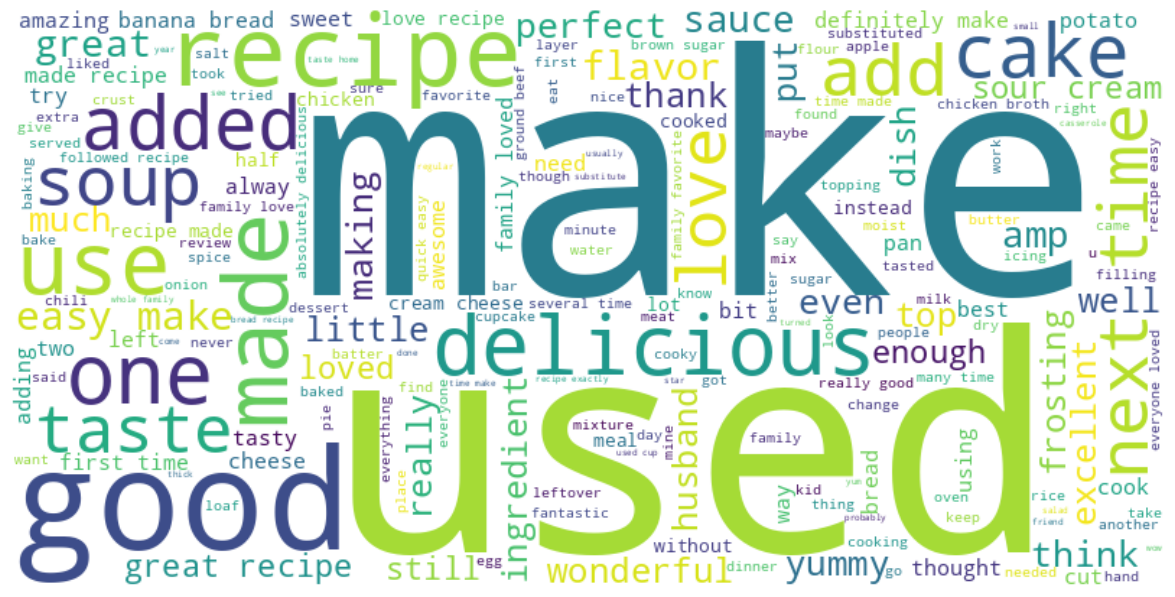

In [ ]:
from wordcloud import WordCloud

# Combine all reviews
all_reviews = ' '.join(X['cleaned_review'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


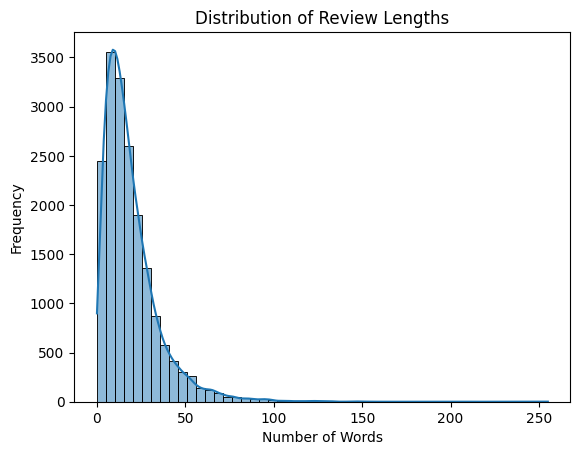

In [ ]:
import seaborn as sns

# Calculate review lengths
X['review_length'] = X['cleaned_review'].apply(lambda x: len(x.split()))

# Plot distribution
sns.histplot(X['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print("Descriptive Statistics :")
print(X.describe())


Descriptive Statistics :
        num_records  recipe_number    recipe_code  user_reputation  \
count  18182.000000   18182.000000   18182.000000     18182.000000   
mean     121.465295      38.689363   21773.667253         2.159608   
std      116.747893      29.786647   23965.109637        10.014666   
min        0.000000       1.000000     386.000000         0.000000   
25%       45.000000      12.000000    6086.000000         1.000000   
50%       91.000000      33.000000   14600.000000         1.000000   
75%      150.000000      64.000000   33121.000000         1.000000   
max      724.000000     100.000000  191775.000000       520.000000   

         created_at   reply_count     thumbs_up   thumbs_down         stars  \
count  1.818200e+04  18182.000000  18182.000000  18182.000000  18182.000000   
mean   1.623710e+09      0.014630      1.089264      0.549335      4.288802   
std    5.468697e+06      0.137974      4.201004      3.470124      1.544786   
min    1.613035e+09      0.0

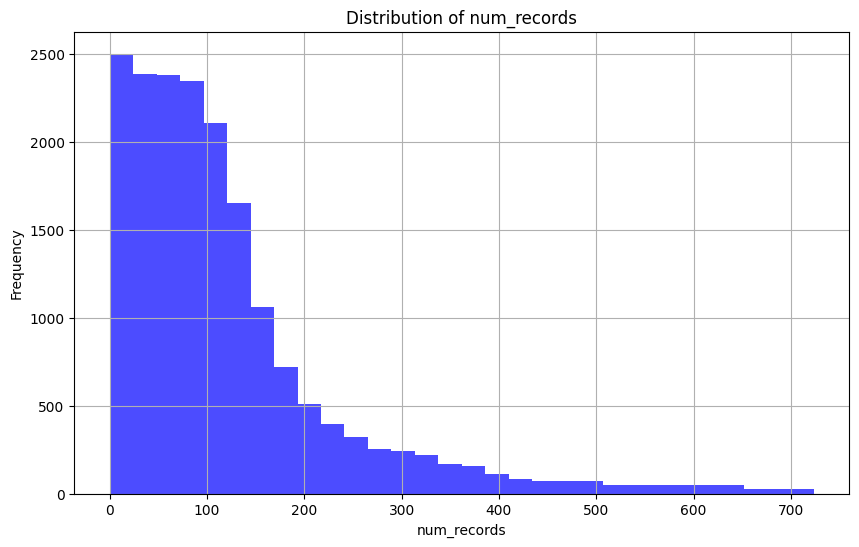

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(X['num_records'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of num_records')
plt.xlabel('num_records')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Check unique values for recipe_number and recipe_code
unique_recipes_number = X['recipe_number'].nunique()
unique_recipes_code = X['recipe_code'].nunique()

print(f"Number of unique recipes (using recipe_number): {unique_recipes_number}")
print(f"Number of unique recipes (using recipe_code): {unique_recipes_code}")

Number of unique recipes (using recipe_number): 100
Number of unique recipes (using recipe_code): 100


<ipython-input-15-52acb9062f39>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_recipe.index, y=reviews_per_recipe.values, palette='viridis')


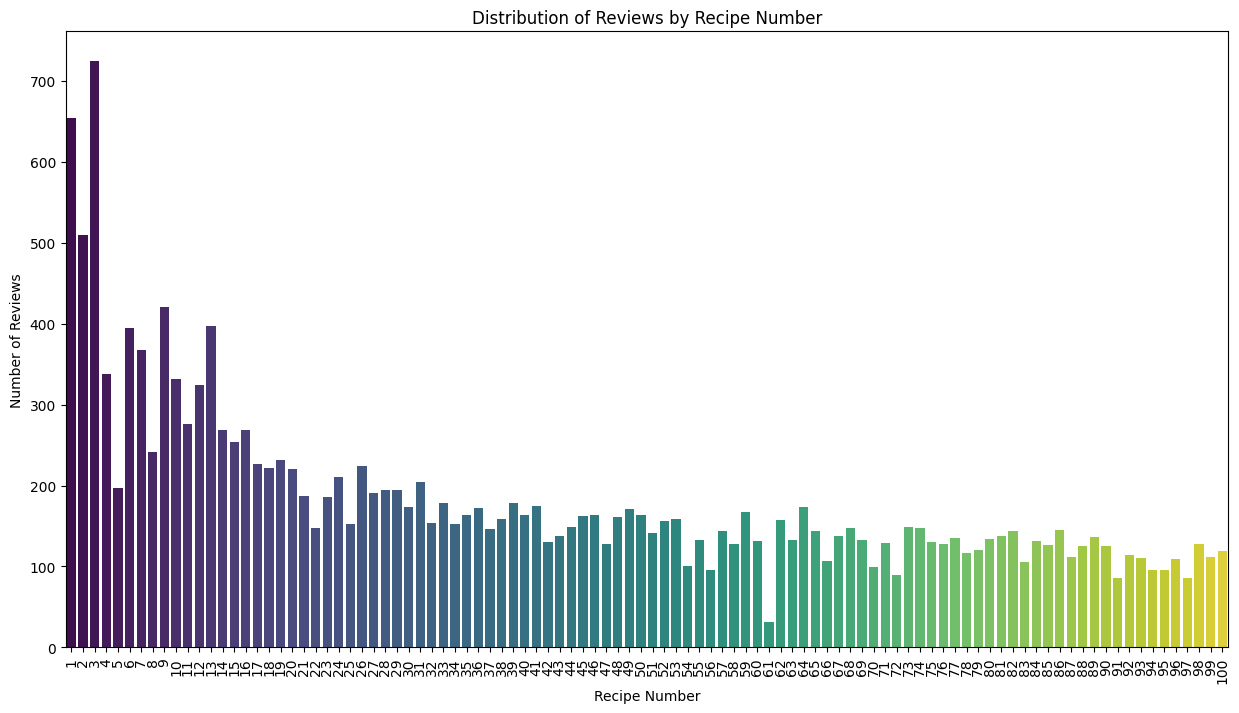

In [ ]:
# Grouping by recipe_number (or recipe_code) to count reviews
reviews_per_recipe = X.groupby('recipe_number')['cleaned_review'].count().sort_values(ascending=False)

# Plotting the distribution of reviews per recipe
plt.figure(figsize=(15,8))
sns.barplot(x=reviews_per_recipe.index, y=reviews_per_recipe.values, palette='viridis')
plt.title('Distribution of Reviews by Recipe Number')
plt.xlabel('Recipe Number')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

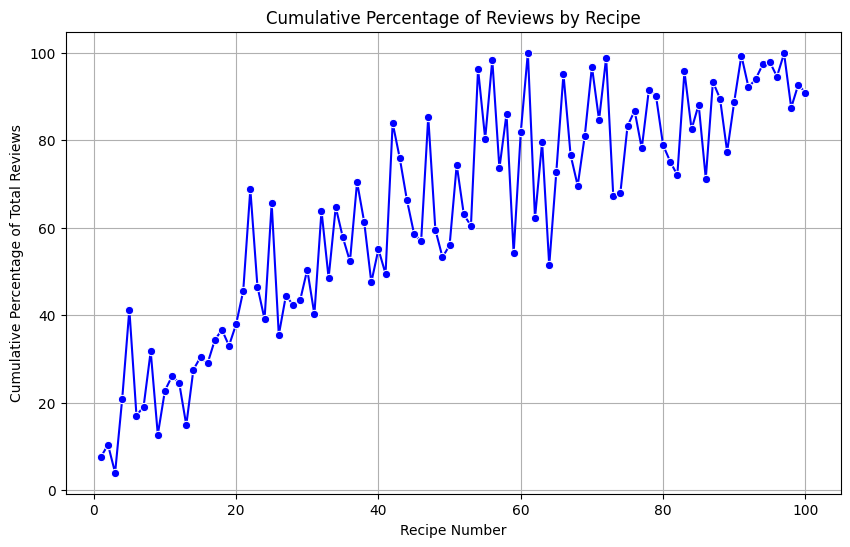

In [ ]:
# Calculate the percentage of reviews per recipe
reviews_per_recipe_percent = (reviews_per_recipe / reviews_per_recipe.sum()) * 100

# Plotting cumulative percentage to check dominance
cumulative_percent = reviews_per_recipe_percent.cumsum()

plt.figure(figsize=(10,6))
sns.lineplot(x=reviews_per_recipe.index, y=cumulative_percent, marker='o', color='blue')
plt.title('Cumulative Percentage of Reviews by Recipe')
plt.xlabel('Recipe Number')
plt.ylabel('Cumulative Percentage of Total Reviews')
plt.grid(True)
plt.show()

# Most and Least Reviewed Recipes

In [ ]:
# Grouping by recipe_number (or recipe_code) to count reviews
reviews_per_recipe = X.groupby('recipe_number')['cleaned_review'].count()
reviews_per_recipe_names = X.groupby('recipe_name')['cleaned_review'].count()
# Most reviewed recipe(s)
most_reviewed_recipe = reviews_per_recipe.idxmax()
most_reviewed_count = reviews_per_recipe.max()

# Least reviewed recipe(s)
least_reviewed_recipe = reviews_per_recipe.idxmin()
least_reviewed_count = reviews_per_recipe.min()

print(f"Recipe with most reviews: {most_reviewed_recipe} (Reviews: {most_reviewed_count})")
print(f"Recipe with least reviews: {least_reviewed_recipe} (Reviews: {least_reviewed_count})")

Recipe with most reviews: 3 (Reviews: 725)
Recipe with least reviews: 61 (Reviews: 31)


# Bar Plot of Top 10 Recipes

<ipython-input-18-57a35cf698b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_recipes.index, y=top_10_recipes.values, palette='magma')


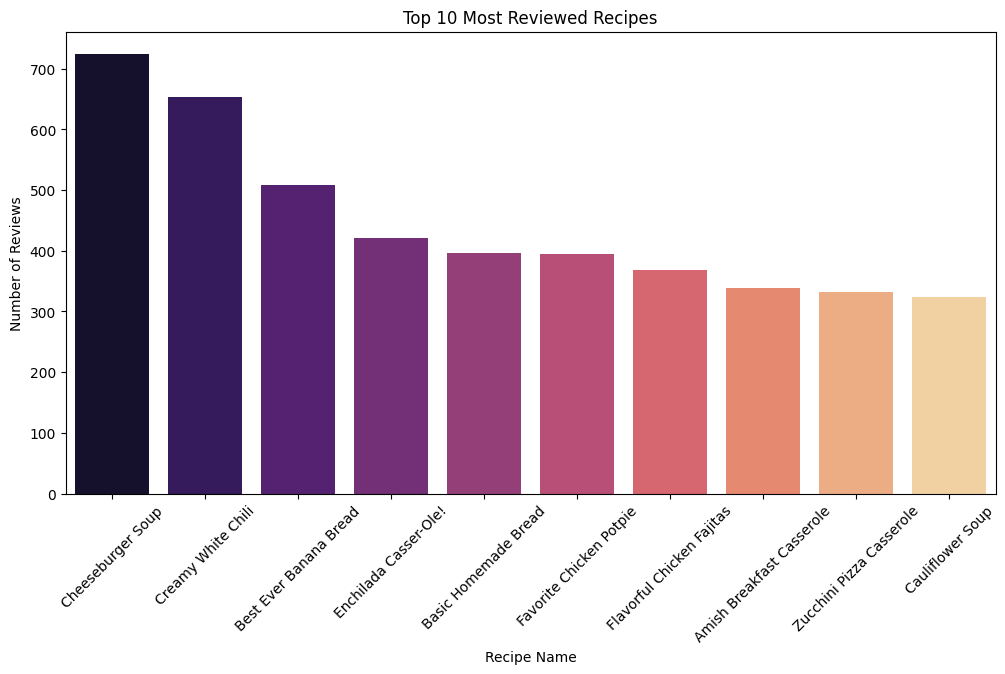

In [ ]:
# Sort reviews_per_recipe in descending order and take the top 10
top_10_recipes = reviews_per_recipe_names.sort_values(ascending=False).head(10)

# Plotting the top 10 most reviewed recipes
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_recipes.index, y=top_10_recipes.values, palette='magma')
plt.title('Top 10 Most Reviewed Recipes')
plt.xlabel('Recipe Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Stats for Thumbs Up and Thumbs Down

In [ ]:
# Basic statistics for numerical columns
basic_stats = X[['thumbs_up', 'thumbs_down', 'stars', 'num_records']].describe()

# Display basic statistics
print(basic_stats)

          thumbs_up   thumbs_down         stars   num_records
count  18182.000000  18182.000000  18182.000000  18182.000000
mean       1.089264      0.549335      4.288802    121.465295
std        4.201004      3.470124      1.544786    116.747893
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      5.000000     45.000000
50%        0.000000      0.000000      5.000000     91.000000
75%        0.000000      0.000000      5.000000    150.000000
max      106.000000    126.000000      5.000000    724.000000


In [ ]:
# Calculate correlation between thumbs_up and thumbs_down
correlation = X[['thumbs_up', 'thumbs_down']].corr()

print("Correlation between thumbs_up and thumbs_down:")
print(correlation)


Correlation between thumbs_up and thumbs_down:
             thumbs_up  thumbs_down
thumbs_up     1.000000     0.373251
thumbs_down   0.373251     1.000000


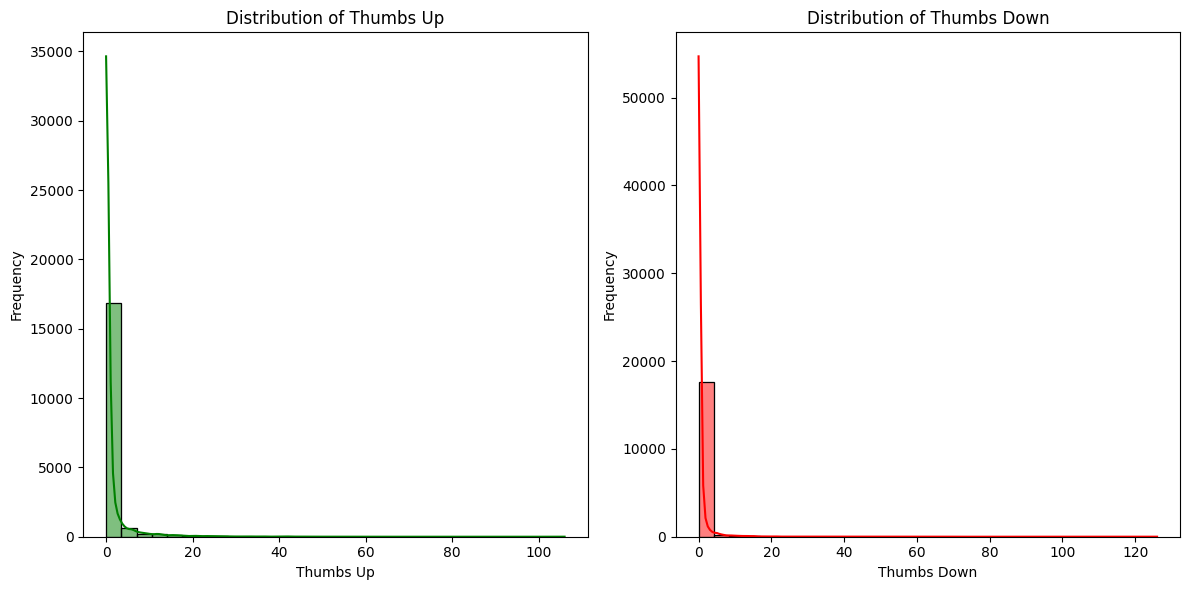

In [ ]:
# Histograms for thumbs_up and thumbs_down
plt.figure(figsize=(12,6))

# Thumbs up distribution
plt.subplot(1, 2, 1)
sns.histplot(X['thumbs_up'], bins=30, kde=True, color='green')
plt.title('Distribution of Thumbs Up')
plt.xlabel('Thumbs Up')
plt.ylabel('Frequency')

# Thumbs down distribution
plt.subplot(1, 2, 2)
sns.histplot(X['thumbs_down'], bins=30, kde=True, color='red')
plt.title('Distribution of Thumbs Down')
plt.xlabel('Thumbs Down')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

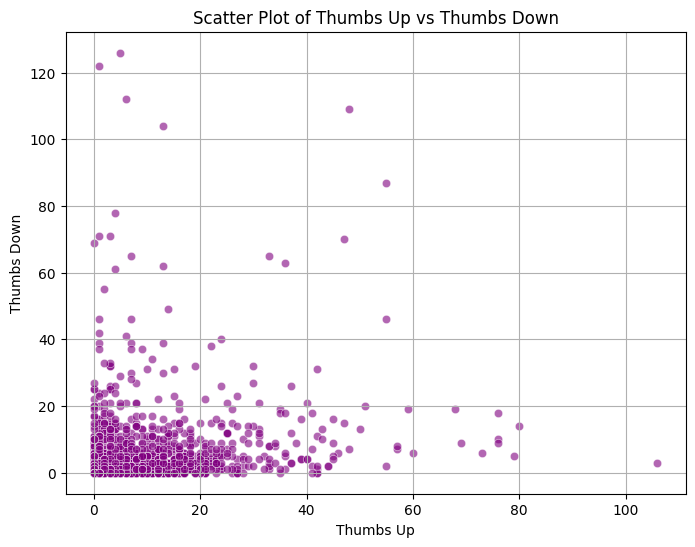

In [ ]:
# Scatter plot showing the relationship between thumbs_up and thumbs_down
plt.figure(figsize=(8,6))
sns.scatterplot(x='thumbs_up', y='thumbs_down', data=X, color='purple', alpha=0.6)
plt.title('Scatter Plot of Thumbs Up vs Thumbs Down')
plt.xlabel('Thumbs Up')
plt.ylabel('Thumbs Down')
plt.grid(True)
plt.show()

In [ ]:
# Define a threshold for what constitutes a "high" number of thumbs_up and thumbs_down
high_threshold_up = X['thumbs_up'].quantile(0.9)  # 90th percentile for thumbs_up
high_threshold_down = X['thumbs_down'].quantile(0.9)  # 90th percentile for thumbs_down

# Filter for polarizing reviews
polarizing_reviews = X[(X['thumbs_up'] >= high_threshold_up) & (X['thumbs_down'] >= high_threshold_down)]

print("Polarizing reviews with high thumbs_up and thumbs_down:")
print(polarizing_reviews[['recipe_number', 'cleaned_review', 'thumbs_up', 'thumbs_down']])

Polarizing reviews with high thumbs_up and thumbs_down:
       recipe_number                                     cleaned_review  \
5                  1       amazing boyfriend loved much going make week   
7                  1  delicious make often one time daughter husband...   
11                 1  best white chili recipe served fritos sharp ch...   
13                 1  made alongside traditional chili winter gather...   
14                 1  fantastic mild added half carolina reaper deli...   
...              ...                                                ...   
18097            100  excelllent recipe recipe created sell jello co...   
18110            100  first time made similar problem others made ro...   
18116            100  cake delicious made sheet cake instead layer c...   
18131            100  love strawberry cake moist tasty put chocolate...   
18139            100  best strawberry cake ever made birthday cake a...   

       thumbs_up  thumbs_down  
5          

<ipython-input-24-4e66f224842d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=X, palette='Blues')


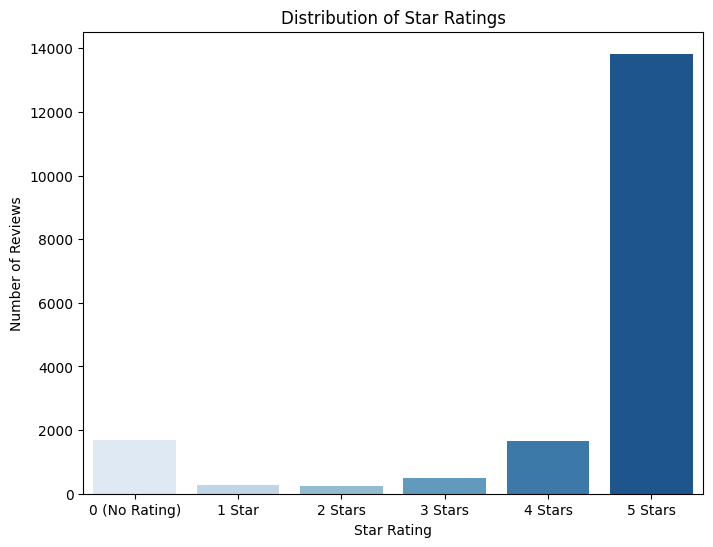

In [ ]:

# Count plot to show the distribution of star ratings
plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=X, palette='Blues')

plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1, 2, 3, 4, 5], labels=['0 (No Rating)', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.show()

In [ ]:
star_stats = X['stars'].describe()
print(star_stats)

count    18182.000000
mean         4.288802
std          1.544786
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64


<ipython-input-26-4b10be5c2d2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_recipe.index, y=average_rating_per_recipe.values, palette='coolwarm')


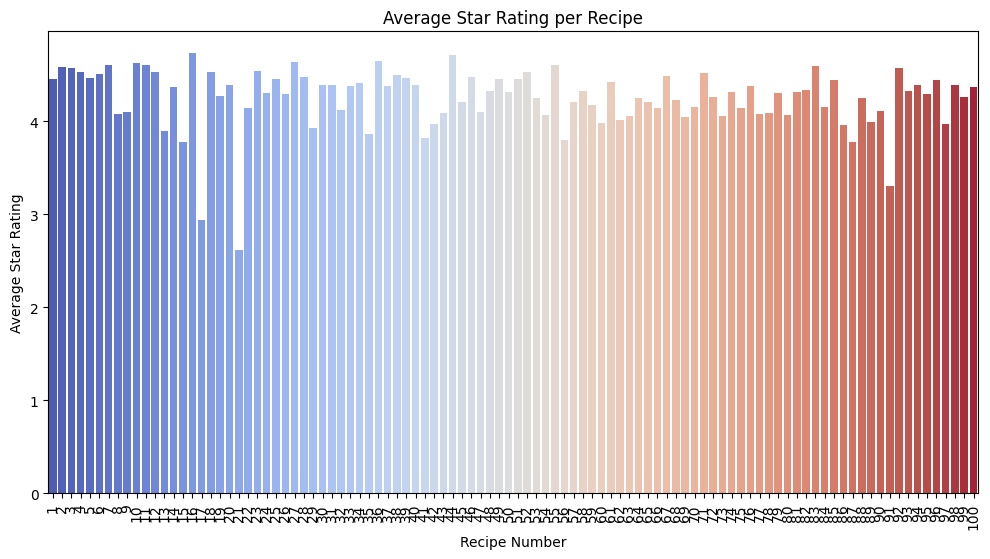

In [ ]:
# Calculate the average rating per recipe
average_rating_per_recipe = X.groupby('recipe_number')['stars'].mean().sort_values(ascending=False)

# Plotting the average rating per recipe
plt.figure(figsize=(12,6))
sns.barplot(x=average_rating_per_recipe.index, y=average_rating_per_recipe.values, palette='coolwarm')

plt.title('Average Star Rating per Recipe')
plt.xlabel('Recipe Number')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=90)
plt.show()


This above graph was not filtered to be without 0 star rating

In [ ]:
# Filter out rows where the star rating is 0
df_filtered = X[X['stars'] != 0]


<ipython-input-28-dc0520384a6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_recipe_filtered.index, y=average_rating_per_recipe_filtered.values, palette='coolwarm')


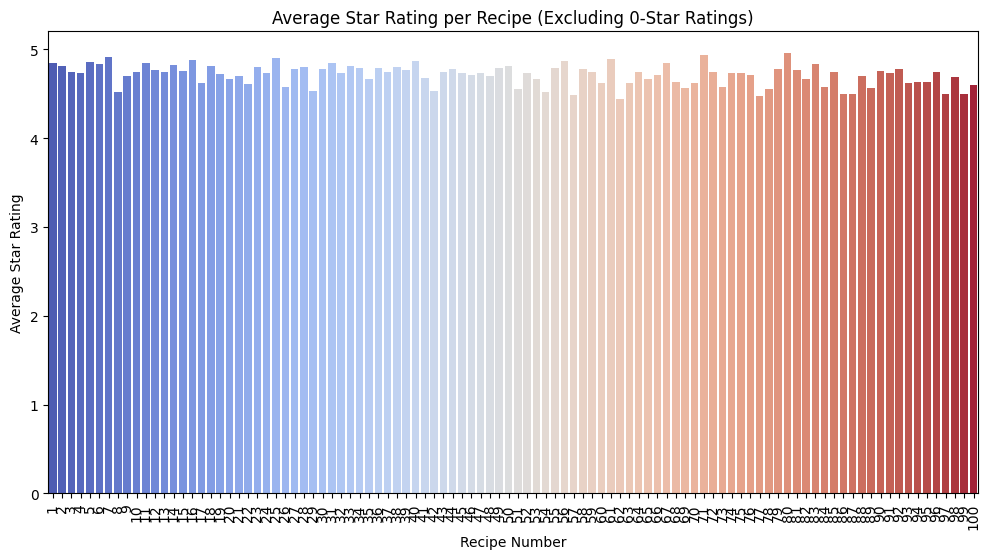

In [ ]:
# Calculate the average rating per recipe excluding 0-star ratings
average_rating_per_recipe_filtered = df_filtered.groupby('recipe_number')['stars'].mean().sort_values(ascending=False)

# Plotting the average rating per recipe
plt.figure(figsize=(12,6))
sns.barplot(x=average_rating_per_recipe_filtered.index, y=average_rating_per_recipe_filtered.values, palette='coolwarm')

plt.title('Average Star Rating per Recipe (Excluding 0-Star Ratings)')
plt.xlabel('Recipe Number')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Calculate the average rating per recipe excluding 0-star ratings
average_rating_per_recipe_filtered = df_filtered.groupby('recipe_number')['stars'].mean()

# Find the recipe with the maximum and minimum average rating
max_rating_recipe = average_rating_per_recipe_filtered.idxmax()  # Recipe with the highest average rating
min_rating_recipe = average_rating_per_recipe_filtered.idxmin()  # Recipe with the lowest average rating

max_rating_value = average_rating_per_recipe_filtered.max()  # Maximum average rating value
min_rating_value = average_rating_per_recipe_filtered.min()  # Minimum average rating value

# Output the results
print(f"Recipe with the highest average rating: Recipe {max_rating_recipe} with an average rating of {max_rating_value:.2f}")
print(f"Recipe with the lowest average rating: Recipe {min_rating_recipe} with an average rating of {min_rating_value:.2f}")


Recipe with the highest average rating: Recipe 80 with an average rating of 4.95
Recipe with the lowest average rating: Recipe 62 with an average rating of 4.44


In [ ]:
# Get the names of the recipes with the max and min ratings
max_rating_recipe_name = X[X['recipe_number'] == max_rating_recipe]['recipe_name'].iloc[0]
min_rating_recipe_name = X[X['recipe_number'] == min_rating_recipe]['recipe_name'].iloc[0]

# Print the names along with their average ratings
print(f"Recipe with the highest average rating: {max_rating_recipe_name} (Recipe {max_rating_recipe}) with an average rating of {max_rating_value:.2f}")
print(f"Recipe with the lowest average rating: {min_rating_recipe_name} (Recipe {min_rating_recipe}) with an average rating of {min_rating_value:.2f}")


Recipe with the highest average rating: Homemade Peanut Butter Cups (Recipe 80) with an average rating of 4.95
Recipe with the lowest average rating: Pork Chops with Scalloped Potatoes (Recipe 62) with an average rating of 4.44


# Primary Sentiment Analysis of Text

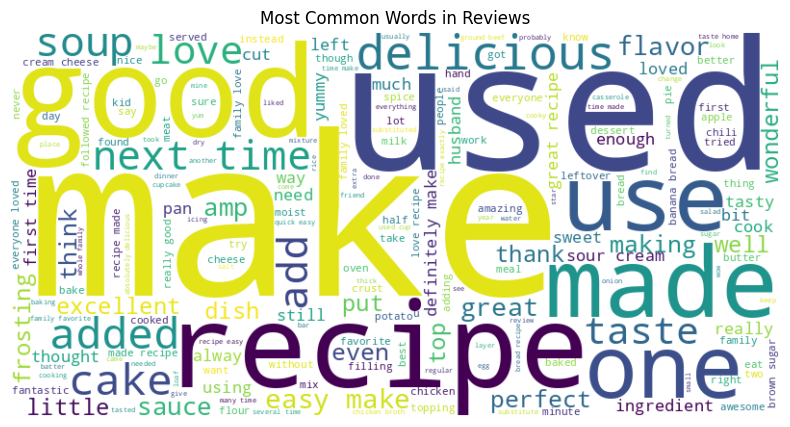

In [ ]:
from wordcloud import WordCloud

# Combine all the cleaned reviews into one string
all_reviews = ' '.join(X['cleaned_review'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


<ipython-input-32-aecb17cb8312>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=X, palette='viridis')


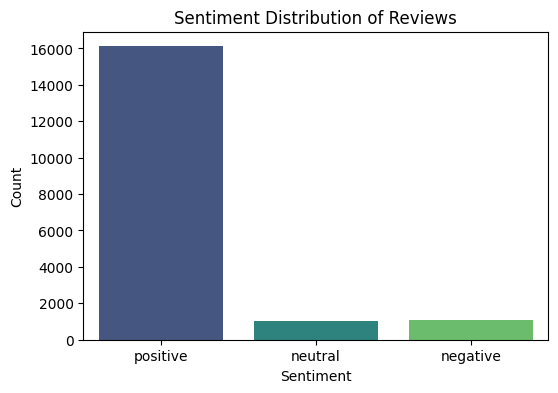

In [ ]:
from textblob import TextBlob

# Function to get the sentiment polarity of the review
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the cleaned_review column
X['sentiment'] = X['cleaned_review'].apply(get_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=X, palette='viridis')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter

# Tokenize the words
tokenized_reviews = X['cleaned_review'].apply(nltk.word_tokenize)

# Function to generate n-grams
def get_ngrams(reviews, n):
    all_ngrams = []
    for review in reviews:
        all_ngrams.extend(list(ngrams(review, n)))
    return all_ngrams

# Get bigrams and trigrams
bigrams = get_ngrams(tokenized_reviews, 2)
trigrams = get_ngrams(tokenized_reviews, 3)

# Find the most common bigrams and trigrams
common_bigrams = Counter(bigrams).most_common(10)
common_trigrams = Counter(trigrams).most_common(10)

# Print the most common bigrams and trigrams
print("Most Common Bigrams:", common_bigrams)
print("Most Common Trigrams:", common_trigrams)


Most Common Bigrams: [(('next', 'time'), 1049), (('easy', 'make'), 943), (('great', 'recipe'), 524), (('sour', 'cream'), 522), (('definitely', 'make'), 503), (('first', 'time'), 470), (('made', 'recipe'), 449), (('family', 'loved'), 446), (('banana', 'bread'), 409), (('cream', 'cheese'), 397)]
Most Common Trigrams: [(('followed', 'recipe', 'exactly'), 160), (('made', 'several', 'time'), 134), (('next', 'time', 'make'), 116), (('banana', 'bread', 'recipe'), 100), (('made', 'many', 'time'), 97), (('first', 'time', 'made'), 96), (('made', 'last', 'night'), 94), (('best', 'banana', 'bread'), 94), (('whole', 'family', 'loved'), 88), (('cream', 'cheese', 'frosting'), 82)]


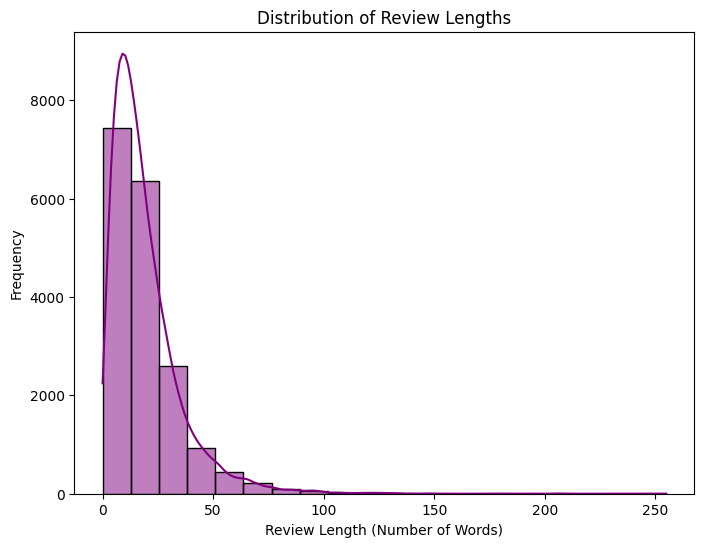

In [ ]:
# Calculate the length of each review (number of words)
X['review_length'] = X['cleaned_review'].apply(lambda x: len(x.split()))

# Plot the histogram of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(X['review_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


Correlation between review length and star ratings:
               review_length     stars
review_length       1.000000  0.045737
stars               0.045737  1.000000


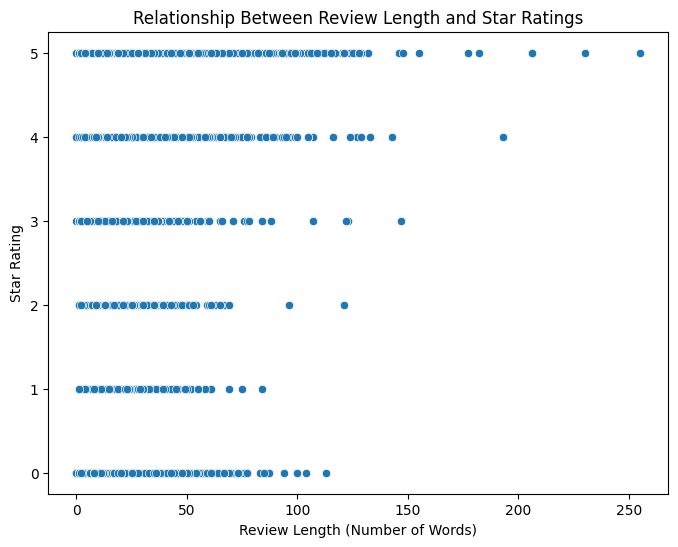

In [ ]:
# Calculate correlation between review length and stars
correlation = X[['review_length', 'stars']].corr()

print(f"Correlation between review length and star ratings:\n{correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x='review_length', y='stars', data=X)
plt.title('Relationship Between Review Length and Star Ratings')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Star Rating')
plt.show()


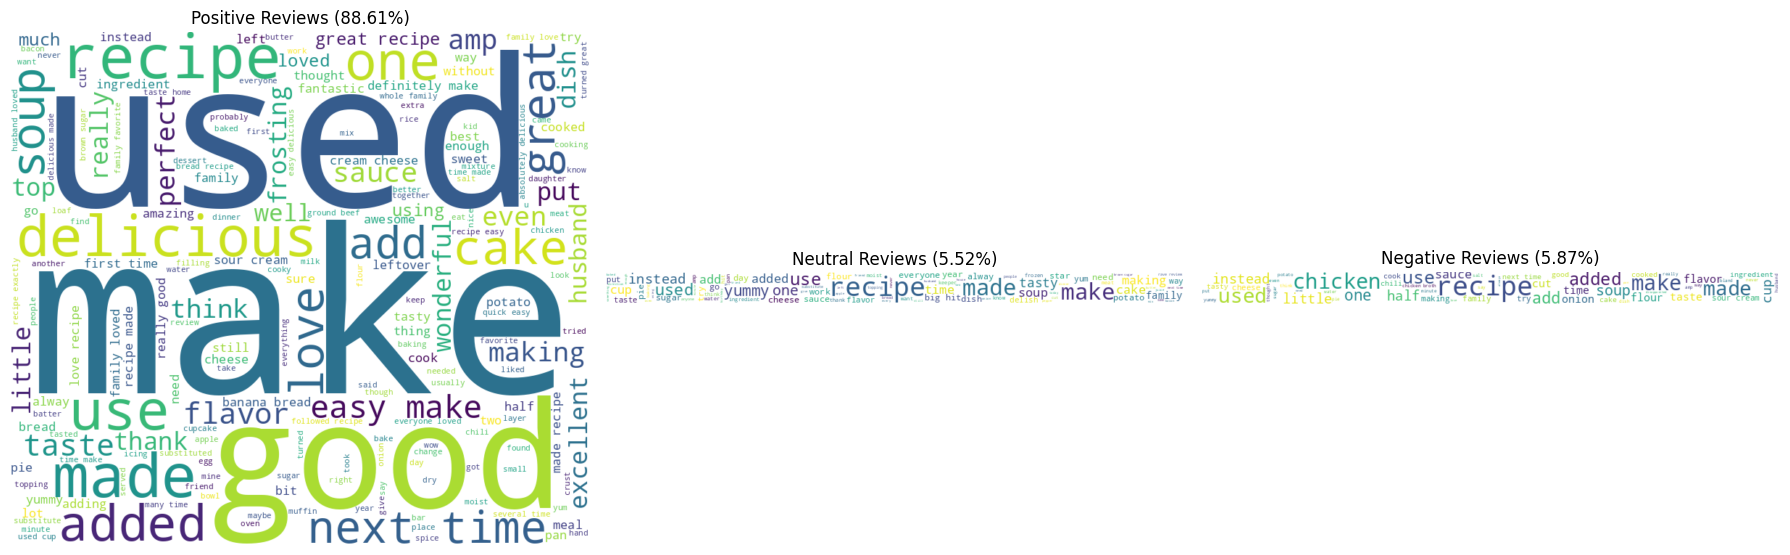

In [ ]:
# Separate the reviews based on sentiment
positive_reviews = ' '.join(X[X['sentiment'] == 'positive']['cleaned_review'].tolist())
negative_reviews = ' '.join(X[X['sentiment'] == 'negative']['cleaned_review'].tolist())
neutral_reviews = ' '.join(X[X['sentiment'] == 'neutral']['cleaned_review'].tolist())

# Calculate the ratios of each sentiment
total_reviews = len(X)
positive_ratio = len(X[X['sentiment'] == 'positive']) / total_reviews
negative_ratio = len(X[X['sentiment'] == 'negative']) / total_reviews
neutral_ratio = len(X[X['sentiment'] == 'neutral']) / total_reviews

# Create word clouds for each sentiment
positive_wordcloud = WordCloud(width=800, height=int(800 * positive_ratio), background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=int(800 * negative_ratio), background_color='white').generate(negative_reviews)
neutral_wordcloud = WordCloud(width=800, height=int(800 * neutral_ratio), background_color='white').generate(neutral_reviews)

# Plot the word clouds in a grid
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot positive word cloud
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title(f'Positive Reviews ({positive_ratio*100:.2f}%)')

# Plot neutral word cloud
ax[1].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title(f'Neutral Reviews ({neutral_ratio*100:.2f}%)')

# Plot negative word cloud
ax[2].imshow(negative_wordcloud, interpolation='bilinear')
ax[2].axis('off')
ax[2].set_title(f'Negative Reviews ({negative_ratio*100:.2f}%)')

plt.tight_layout()
plt.show()

# ***Feature Extraction***

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag of Words model
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_bow = vectorizer.fit_transform(X['cleaned_review'])


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Using unigrams and bigrams
X_tfidf = tfidf_vectorizer.fit_transform(X['cleaned_review'])


## N-Grams

### Unigrams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer for unigrams (single words)
tfidf_unigram = TfidfVectorizer(ngram_range=(1, 1))  # ngram_range=(1, 1) means unigrams only
X_unigrams = tfidf_unigram.fit_transform(X['cleaned_review'])

# Get the feature names (unigrams) and their TF-IDF scores
unigram_features = tfidf_unigram.get_feature_names_out()
unigram_matrix = X_unigrams.toarray()

# Print the unigram matrix (for the first 5 features)
print(pd.DataFrame(unigram_matrix, columns=unigram_features).head())


    aa  aaahs  aalthough   ab  aback  abd  aberration  abigail  ability  able  \
0  0.0    0.0        0.0  0.0    0.0  0.0         0.0      0.0      0.0   0.0   
1  0.0    0.0        0.0  0.0    0.0  0.0         0.0      0.0      0.0   0.0   
2  0.0    0.0        0.0  0.0    0.0  0.0         0.0      0.0      0.0   0.0   
3  0.0    0.0        0.0  0.0    0.0  0.0         0.0      0.0      0.0   0.0   
4  0.0    0.0        0.0  0.0    0.0  0.0         0.0      0.0      0.0   0.0   

   ...  zuc  zucc  zucchini  zucchinie  zuchiini  zuchini  zuchinni  zucs  \
0  ...  0.0   0.0       0.0        0.0       0.0      0.0       0.0   0.0   
1  ...  0.0   0.0       0.0        0.0       0.0      0.0       0.0   0.0   
2  ...  0.0   0.0       0.0        0.0       0.0      0.0       0.0   0.0   
3  ...  0.0   0.0       0.0        0.0       0.0      0.0       0.0   0.0   
4  ...  0.0   0.0       0.0        0.0       0.0      0.0       0.0   0.0   

   zuke  zukes  
0   0.0    0.0  
1   0.0    0.0  

### Bigrams

In [ ]:
# Vectorizer for bigrams (pairs of words)
tfidf_bigram = TfidfVectorizer(ngram_range=(2, 2))  # ngram_range=(2, 2) means bigrams only
X_bigrams = tfidf_bigram.fit_transform(X['cleaned_review'])

# Get the feature names (bigrams) and their TF-IDF scores
bigram_features = tfidf_bigram.get_feature_names_out()
bigram_matrix = X_bigrams.toarray()

# Print the bigram matrix
print(pd.DataFrame(bigram_matrix, columns=bigram_features).head())


   aaahs beautiful  aalthough tripled  ab lr  aback title  abd fujie  \
0              0.0                0.0    0.0          0.0        0.0   
1              0.0                0.0    0.0          0.0        0.0   
2              0.0                0.0    0.0          0.0        0.0   
3              0.0                0.0    0.0          0.0        0.0   
4              0.0                0.0    0.0          0.0        0.0   

   aberration thank  ability followed  ability halve  ability whole  able add  \
0               0.0               0.0            0.0            0.0       0.0   
1               0.0               0.0            0.0            0.0       0.0   
2               0.0               0.0            0.0            0.0       0.0   
3               0.0               0.0            0.0            0.0       0.0   
4               0.0               0.0            0.0            0.0       0.0   

   ...  zuchini wonderful  zuchinni cupcake  zuchinni garden  \
0  ...          

### Trigrams

In [ ]:
# Vectorizer for trigrams (triplets of words)
tfidf_trigram = TfidfVectorizer(ngram_range=(3, 3))  # ngram_range=(3, 3) means trigrams only
X_trigrams = tfidf_trigram.fit_transform(X['cleaned_review'])

# Get the feature names (trigrams) and their TF-IDF scores
trigram_features = tfidf_trigram.get_feature_names_out()
trigram_matrix = X_trigrams.toarray()

# Print the trigram matrix
print(pd.DataFrame(trigram_matrix, columns=trigram_features).head())


   aaahs beautiful impressive  aalthough tripled recipe  ab lr aiihqfj  \
0                         0.0                       0.0            0.0   
1                         0.0                       0.0            0.0   
2                         0.0                       0.0            0.0   
3                         0.0                       0.0            0.0   
4                         0.0                       0.0            0.0   

   aback title expecting  abd fujie apple  aberration thank advance  \
0                    0.0              0.0                       0.0   
1                    0.0              0.0                       0.0   
2                    0.0              0.0                       0.0   
3                    0.0              0.0                       0.0   
4                    0.0              0.0                       0.0   

   ability followed written  ability halve prep  ability whole familly  \
0                       0.0                 0.0       

### N-Grams

In [ ]:
# Vectorizer for unigrams, bigrams, and trigrams combined
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 3))  # Unigrams, bigrams, and trigrams
X_ngrams = tfidf_ngram.fit_transform(X['cleaned_review'])

# Get the feature names (mixed n-grams) and their TF-IDF scores
ngram_features = tfidf_ngram.get_feature_names_out()
ngram_matrix = X_ngrams.toarray()

# Print the n-gram matrix
print(pd.DataFrame(ngram_matrix, columns=ngram_features).head())


    aa  aaahs  aaahs beautiful  aaahs beautiful impressive  aalthough  \
0  0.0    0.0              0.0                         0.0        0.0   
1  0.0    0.0              0.0                         0.0        0.0   
2  0.0    0.0              0.0                         0.0        0.0   
3  0.0    0.0              0.0                         0.0        0.0   
4  0.0    0.0              0.0                         0.0        0.0   

   aalthough tripled  aalthough tripled recipe   ab  ab lr  ab lr aiihqfj  \
0                0.0                       0.0  0.0    0.0            0.0   
1                0.0                       0.0  0.0    0.0            0.0   
2                0.0                       0.0  0.0    0.0            0.0   
3                0.0                       0.0  0.0    0.0            0.0   
4                0.0                       0.0  0.0    0.0            0.0   

   ...  zuke  zuke mixture  zuke mixture canned  zuke muffin  \
0  ...   0.0           0.0        

## Some Visualizations on N-Grams

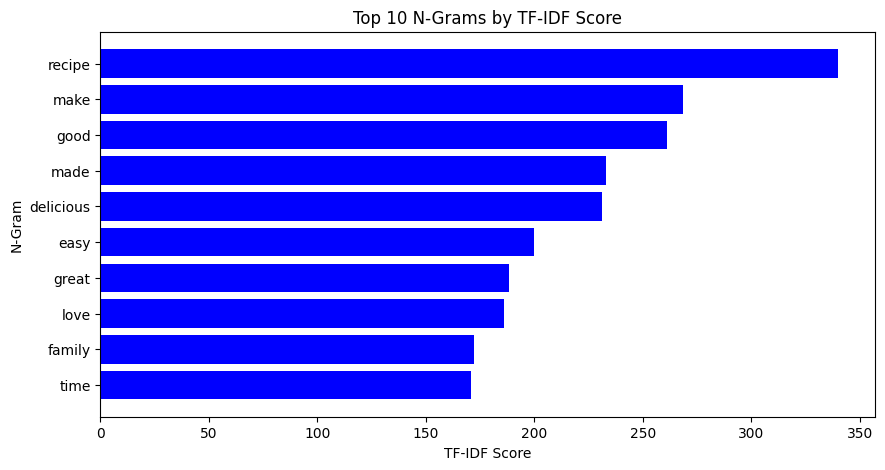

In [ ]:
# Sum the TF-IDF scores for each n-gram across all reviews
sum_ngram_scores = X_ngrams.sum(axis=0)

# Create a DataFrame of n-grams and their total scores
ngram_scores = pd.DataFrame({'ngram': ngram_features, 'score': sum_ngram_scores.A1}).sort_values(by='score', ascending=False)

# Plot the top 10 n-grams
top_ngrams = ngram_scores.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_ngrams['ngram'], top_ngrams['score'], color='blue')
plt.xlabel('TF-IDF Score')
plt.ylabel('N-Gram')
plt.title('Top 10 N-Grams by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

### Word Cloud

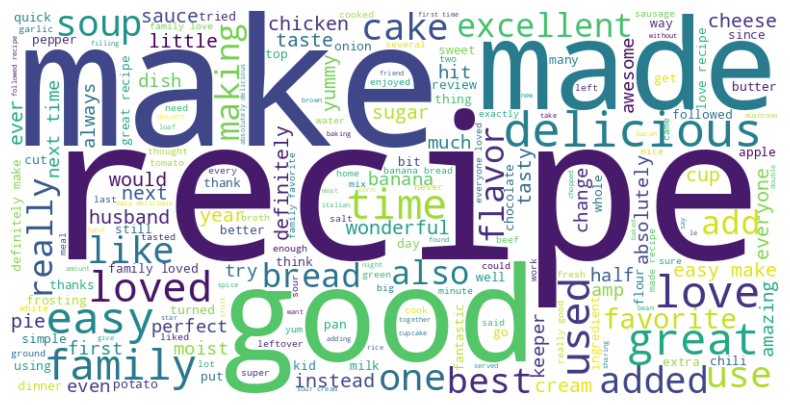

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for unigrams, bigrams, or trigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(ngram_scores.values))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-10-24 13:46:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-24 13:46:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-24 13:46:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Load GloVe word embeddings (you need to download the file from the GloVe website)
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for your dataset
embedding_dim = 100
embedding_matrix = np.zeros((len(tfidf_vectorizer.get_feature_names_out()), embedding_dim))
for i, word in enumerate(tfidf_vectorizer.get_feature_names_out()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


## Sentiment Features

In [ ]:
!pip install vaderSentiment



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
X['sentiment_score'] = X['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

## Custom Features

In [ ]:

# Length of review as a feature
X['review_length'] = X['cleaned_review'].apply(len)

# Thumbs up/down ratio
X['thumbs_ratio'] = X['thumbs_up'] / (X['thumbs_down'] + 1)



# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
non_zero_X = X[X['stars']>0]
new_X = non_zero_X[['thumbs_up' , 'thumbs_down' , 'thumbs_ratio' , 'review_length' , 'sentiment_score']]

y = non_zero_X['stars']

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)


In [ ]:
print(X['sentiment_score'])
print(X['cleaned_review'])

0        0.8841
1        0.7351
2        0.9348
3        0.0000
4        0.5719
          ...  
18177    0.4588
18178    0.5994
18179    0.9287
18180    0.5267
18181    0.9508
Name: sentiment_score, Length: 18182, dtype: float64
0        tweaked little removed onion onion hater house...
1        bush used white chili bean made recipe super s...
2        complicated white chicken chili recipe made ye...
3        introduction mentioned cream cheese none liste...
4        wonderful made chili stew night dinner church ...
                               ...                        
18177    strawberry cake family favorite since past sev...
18178    received endless compliment cake used firmer s...
18179    cake delicious moist need sugar called frostin...
18180    made wonderful frosting wish made thicker tad ...
18181    omg must make cake made strawberry crazy daugh...
Name: cleaned_review, Length: 18182, dtype: object


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8420254699818072
[[   5    3    4    1   46]
 [   1    0    2    1   36]
 [   3    0    3    0   84]
 [   1    0    2    0  333]
 [   2    0    0    2 2769]]
              precision    recall  f1-score   support

           1       0.42      0.08      0.14        59
           2       0.00      0.00      0.00        40
           3       0.27      0.03      0.06        90
           4       0.00      0.00      0.00       336
           5       0.85      1.00      0.92      2773

    accuracy                           0.84      3298
   macro avg       0.31      0.22      0.22      3298
weighted avg       0.73      0.84      0.77      3298



In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)



ValueError: Negative values in data passed to MultinomialNB (input X)